In [1]:
from fastai.vision.all import *

In [2]:
# Set the path to the folder containing all images
input_folder = "weather"

In [3]:
# Set the paths for the output folders for each class
output_folders = {
    "sunrise": "weather_images/sunrise_images",
    "shine": "weather_images/shine_images",
    "cloudy": "weather_images/cloudy_images",
    "rain": "weather_images/rainy_images",
}

In [4]:
# Create output folders if they don't exist
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

In [5]:
# Iterate through all images in the input folder
for image_filename in os.listdir(input_folder):
    image_path = os.path.join(input_folder, image_filename)

    # Extract class name from the image filename
    class_name = image_filename.split(".")[0]
    class_name = "".join(char for char in class_name if char.isalpha())

    # Check if the class name is one of the predefined classes
    if class_name in output_folders:
        # Move the image to the corresponding output folder
        destination_folder = output_folders[class_name]
        destination_path = os.path.join(destination_folder, image_filename)
        shutil.move(image_path, destination_path)
    else:
        print(f"Class '{class_name}' not recognized. Image '{image_filename}' not moved.")

In [6]:
# Path to the data folder
data_path = Path("weather_images")

In [7]:
# Load data using fastai
dls = ImageDataLoaders.from_folder(data_path, train='.', valid_pct=0.2, item_tfms=Resize(460), batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

C:\Users\TSA\anaconda3\envs\tf\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [8]:
# Create a CNN model using a pre-trained architecture from fastai (resnet34 in this case)
learn = vision_learner(dls, resnet34, metrics=accuracy)

In [9]:
# Fine-tune the model
learn.fine_tune(epochs=10)

epoch,train_loss,valid_loss,accuracy,time
0,1.362507,0.324881,0.897778,01:16


epoch,train_loss,valid_loss,accuracy,time
0,0.281529,0.163664,0.946667,01:43
1,0.187498,0.143109,0.955556,01:43
2,0.150047,0.113398,0.964444,01:41
3,0.122923,0.189772,0.960000,01:42
4,0.104824,0.113675,0.964444,01:53
5,0.085056,0.091261,0.977778,01:55
6,0.069968,0.104837,0.977778,01:57
7,0.058411,0.097603,0.982222,01:56
8,0.047883,0.094513,0.982222,01:59
9,0.041206,0.091190,0.982222,02:07


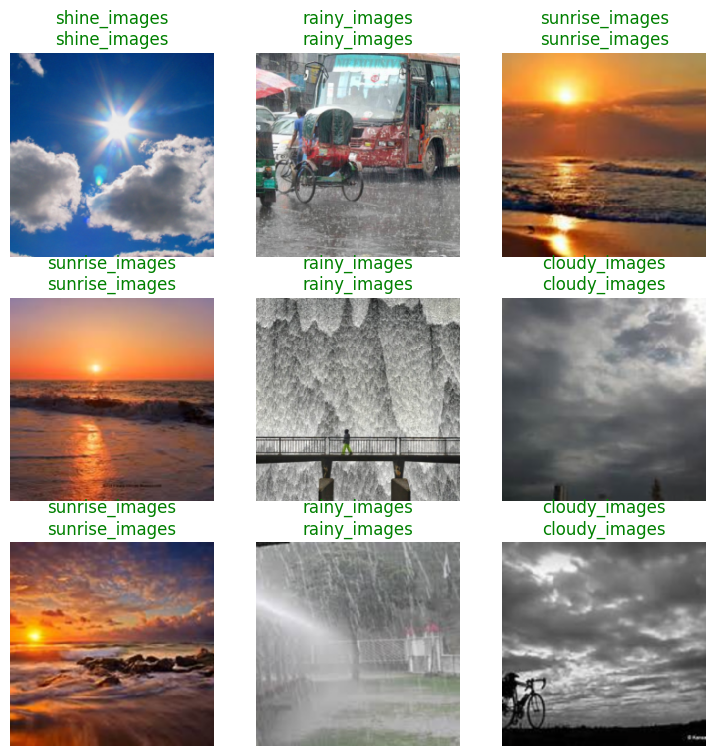

In [10]:
# Show results
learn.show_results()

In [18]:
# Evaluate the model on the test set
test_accuracy = learn.validate()[1]
test_loss = learn.validate()[0]
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

Test Accuracy: 98.22%
Test Loss: 9.12%


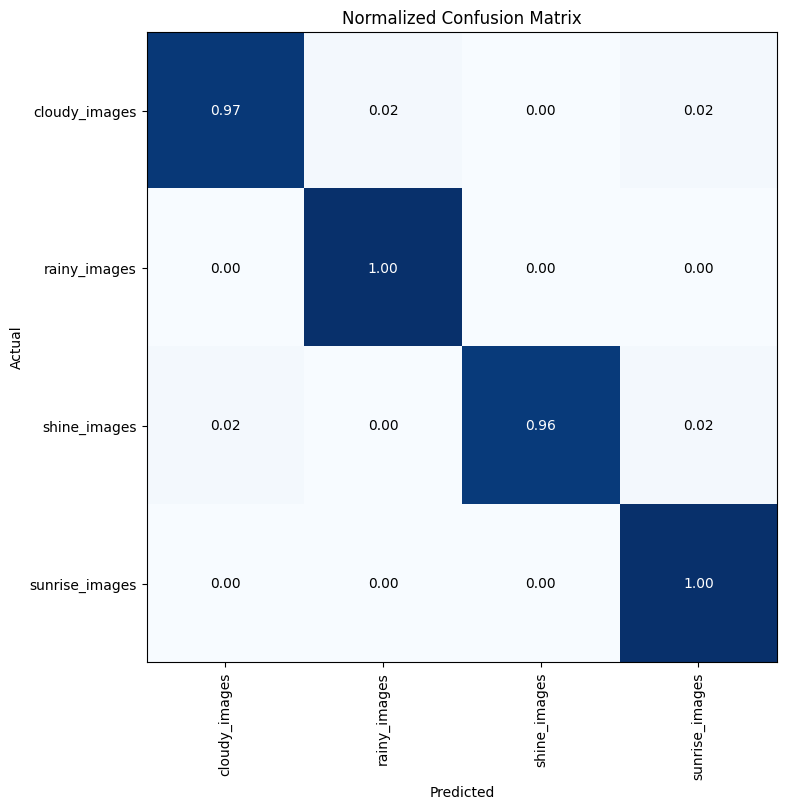

In [12]:
# Plot confusion matrix and classification report
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8, 8), cmap='Blues', normalize=True)
plt.title('Normalized Confusion Matrix')
plt.show()